In [1]:
!pip install nltk
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=3d3771671a1236ed4f81a193144d7b8fbbbd561c139fb46d975436d0cfef0145
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


Total Samples: 7000
Encoder Vocabulary Size: 305 | Decoder Vocabulary Size: 526
Maximum Encoder Length: 7 | Maximum Decoder Length: 12
Dataset Split Sizes -> Training: 5600 | Validation: 700 | Test: 700


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ decoder_inputs      │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_emb (Embedding) │ (None, 12, 256)   │    134,656 │ decoder_inputs[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_inputs      │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 12, 256)   │          0 │ dec_emb[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 12)        │          0 │ decoder_inputs[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_emb (Embedding) │ (None, 7, 256)    │     78,080 │ encoder_inputs[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 7)         │          0 │ encoder_inputs[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_gru_1 (GRU) │ (None, 12, 768)   │  2,361,600 │ dropout[0][0],    │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_bi_1        │ (None, 7, 768)    │  1,476,864 │ enc_emb[0][0],    │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_gru_2 (GRU) │ (None, 12, 768)   │  3,541,248 │ decoder_gru_1[0]… │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_bi_2        │ (None, 7, 768)    │  2,656,512 │ encoder_bi_1[0][… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_mask (Lambda)   │ (None, 7)         │          0 │ encoder_inputs[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_attention       │ (None, 12, 768)   │          0 │ decoder_gru_2[0]… │
│ (Lambda)            │                   │            │ encoder_bi_2[0][… │
│                     │                   │            │ enc_mask[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_ctx_dec      │ (None, 12, 1536)  │          0 │ decoder_gru_2[0]… │
│ (Concatenate)       │                   │            │ dot_attention[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ final_dense (Dense) │ (None, 12, 526)   │    808,462 │ concat_ctx_dec[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,057,422 (42.18 MB)

 Trainable params: 11,057,422 (42.18 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/75
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1176 - loss: 4.8180
Epoch 1: val_loss improved from inf to 3.00278, saving model to best_seq2seq_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.1179 - loss: 4.8137 - val_accuracy: 0.2590 - val_loss: 3.0028 - learning_rate: 5.0000e-04
Epoch 2/75
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2892 - loss: 2.6865
Epoch 2: val_loss improved from 3.00278 to 2.13629, saving model to best_seq2seq_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.2893 - loss: 2.6852 - val_accuracy: 0.3518 - val_loss: 2.1363 - learning_rate: 5.0000e-04
Epoch 3/75
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3765 - loss: 1.9452
Epoch 3: val_loss improved from 2.13629 to 1.76067, saving model to best_seq2seq_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.3766 - loss: 1.9447 - val_accuracy: 0.4043 - val_loss: 1.7607 - learning_rate: 5.0

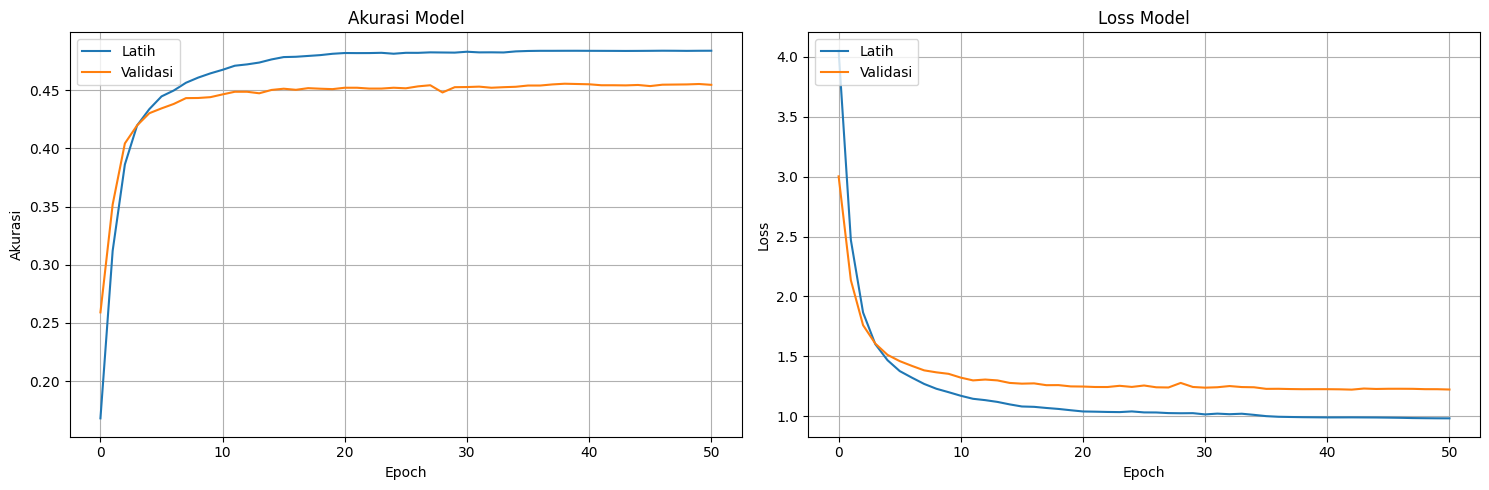


--- Model Prediction Examples (Test Set) ---
INPUT          : semangka, stroberi, pisang
GROUND TRUTH   : Ada semangka, stroberi, dan pisang.
OUTPUT         : Ada semangka, stroberi dan pisang.

INPUT          : kakek, makan
GROUND TRUTH   : Kakek sedang makan.
OUTPUT         : Kakek sedang makan makan.

INPUT          : ibu, makan, kacang
GROUND TRUTH   : Ibu sedang makan kacang.
OUTPUT         : Ibu sedang makan kacang.

INPUT          : adik perempuan, mau, kelinci
GROUND TRUTH   : Adik perempuan mau kelinci.
OUTPUT         : Adik perempuan mau kelinci.

INPUT          : makan, ayam goreng, nasi
GROUND TRUTH   : Sedang makan ayam goreng dan nasi.
OUTPUT         : Sedang makan ayam goreng dan nasi.

INPUT          : kamu, mau, lihat, handphone
GROUND TRUTH   : Kamu mau melihat handphone.
OUTPUT         : Kamu mau melihat handphone.

INPUT          : tas ransel, ini, buruk, kotor
GROUND TRUTH   : Tas ransel ini terlihat buruk dan kotor.
OUTPUT         : Tas ransel ini terlihat buruk 

In [ ]:
"""
Skrip ini membangun, melatih, dan mengevaluasi model Sequence-to-Sequence (Seq2Seq)
dengan mekanisme atensi untuk menerjemahkan sekuens kata kunci menjadi kalimat lengkap.
Prosesnya meliputi pemuatan data, prapemrosesan, definisi arsitektur, pelatihan,
evaluasi dengan metrik BLEU/ROUGE, dan memplot riwayat pelatihan.
"""

# --- Inisialisasi Awal ---
import os
# Mengabaikan log TensorFlow (1 = INFO, 2 = WARNING, 3 = ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
# Mengabaikan log library
warnings.filterwarnings("ignore", category=UserWarning)

import json, re, pickle
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, GRU, Bidirectional, Dense, Concatenate, Lambda, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# --- Pengecekan Library untuk Metrik Evaluasi (BLEU dan ROUGE) ---
try:
    from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
    NLTK_AVAILABLE = True
except ImportError:
    NLTK_AVAILABLE = False
    print("WARNING: NLTK not found. BLEU metric will not be calculated. Install: pip install nltk")

try:
    from rouge_score import rouge_scorer
    ROUGE_AVAILABLE = True
except ImportError:
    ROUGE_AVAILABLE = False
    print("WARNING: ROUGE-score not found. ROUGE metrics will not be calculated. Install: pip install rouge-score")

# --- Konfigurasi dan Hyperparameters Tuning ---
# Jalur File
DATA_PATH = "/content/Dataset_7000.jsonl"
MODEL_PATH = "seq2seq_model.keras"
TOK_ENC_PATH = "tokenizer_enc.pkl"
TOK_DEC_PATH = "tokenizer_dec.pkl"

# Hiperparameter Model & Pelatihan
BATCH_SIZE = 32
EPOCHS = 75
LATENT_DIM = 384   # Dimensi hidden state GRU
EMBED_DIM = 256    # Dimensi vektor embedding
LABEL_SMOOTH = 0.1

# Hiperparameter Dekoding untuk Beam Search
BEAM_WIDTH = 5
TOP_K = 5
LENGTH_PENALTY_ALPHA = 0.8
REPETITION_PENALTY = 1.2
NO_REPEAT_NGRAM_SIZE = 3
REQUIRED_TOKEN_PENALTY = -100.0

# --- Pemuatan Dataset (.JSONL) ---
data = []
try:
    with open(DATA_PATH, "r", encoding="utf-8") as f:
        for line in f:
            if line.strip():
                data.append(json.loads(line))
except FileNotFoundError:
    print(f"Error: Dataset file not found at '{DATA_PATH}'")
    exit()

# Ekstrak teks masukan (encoder) dan target (decoder)
input_texts = [d["input_text"].strip() for d in data]
# Tambahkan token <start> dan <end> ke teks target untuk decoder
target_texts = ["<start> " + d["target_text"].strip() + " <end>" for d in data]
print("Total Samples:", len(input_texts))

# --- Tokenisasi dan Padding ---
# Buat dan latih tokenizer untuk encoder
enc_tok = Tokenizer(filters="", lower=True, oov_token="<unk>") # filters="" menentukan karakter yang harus dihapus
enc_tok.fit_on_texts(input_texts) # membangun kosakata
enc_seq = enc_tok.texts_to_sequences(input_texts) # vektorisasi (list of list)

# Buat dan latih tokenizer terpisah untuk decoder
dec_tok = Tokenizer(filters="", lower=True, oov_token="<unk>")
dec_tok.fit_on_texts(target_texts)
dec_seq = dec_tok.texts_to_sequences(target_texts)

# Tentukan panjang sekuens maksimum untuk padding
max_enc_len = max(len(s) for s in enc_seq)
max_dec_len = max(len(s) for s in dec_seq)

# Lakukan padding pada sekuens untuk memastikan panjang yang seragam
enc_input = pad_sequences(enc_seq, maxlen=max_enc_len, padding="post") # padding (list of list)
dec_input = pad_sequences(dec_seq, maxlen=max_dec_len, padding="post")

# Buat data target decoder dengan menggeser masukan decoder satu langkah ke kiri
# Ini adalah target untuk mekanisme "teacher forcing".
# Contoh: dec_input = [<start>, A, B, C, <end>] -> dec_target = [A, B, C, <end>, <pad>]
dec_target = np.zeros_like(dec_input)
dec_target[:, :-1] = dec_input[:, 1:]
dec_target[:, -1] = 0

# Ukuran kosakata (+1 untuk token padding '0' yang sudah direservasi)
num_enc_tokens = len(enc_tok.word_index) + 1
num_dec_tokens = len(dec_tok.word_index) + 1

print(f"Encoder Vocabulary Size: {num_enc_tokens} | Decoder Vocabulary Size: {num_dec_tokens}")
print(f"Maximum Encoder Length: {max_enc_len} | Maximum Decoder Length: {max_dec_len}")

# --- Pembagian Dataset (80% Latih, 10% Validasi, 10% Uji) ---
indices = np.arange(len(enc_input)) # [0, 1, 2, ..., 6999]
train_idx, test_idx = train_test_split(indices, test_size=0.1, random_state=42)
train_idx, val_idx = train_test_split(train_idx, test_size=0.111111, random_state=42) # 0.111111 * 0.9 = 0.1

enc_tr, dec_in_tr, dec_tar_tr = enc_input[train_idx], dec_input[train_idx], dec_target[train_idx]
enc_val, dec_in_val, dec_tar_val = enc_input[val_idx], dec_input[val_idx], dec_target[val_idx]
enc_te, dec_in_te, dec_tar_te = enc_input[test_idx], dec_input[test_idx], dec_target[test_idx]

print(f"Dataset Split Sizes -> Training: {len(enc_tr)} | Validation: {len(enc_val)} | Test: {len(enc_te)}") # 5600, 700, 700

# --- Fungsi Pembantu Model ---
def create_encoder_mask(inputs): # inputs = enc_input
    """Membuat mask untuk mengabaikan token padding (indeks 0) di keluaran encoder."""
    return tf.cast(tf.not_equal(inputs, 0), tf.float32) # hasil akhir tf tensor 2D

def dot_attention_fn(args): # args = [anotasi encoder, encoder mask, anotasi decoder]
    # enc_out_tensor, dec_out_tensor shape = (batch size, max_enc_len, 768)
    """
    Menghitung Atensi Dot-Product.

    Args:
        args (list): Sebuah list berisi [enc_out_tensor, enc_mask_tensor, dec_out_tensor].

    Returns:
        tf.Tensor: Vektor konteks.
    """
    dec_out_tensor, enc_out_tensor, enc_mask_tensor = args
    # Hitung skor keselarasan (alignment scores)
    scores = tf.matmul(dec_out_tensor, enc_out_tensor, transpose_b=True) # (batch size, max_dec_len, max_enc_len)
    # Terapkan mask ke skor
    mask = tf.expand_dims(enc_mask_tensor, axis=1) # (batch size, max_enc_len) -> (batch size, 1, max_enc_len)
    scores += (1.0 - mask) * -1e9 # Tambahkan nilai negatif besar (-1 x 10^9 = -1.000.000.000) ke posisi yang di-padding
    # Normalisasi skor untuk mendapatkan bobot atensi
    attn = tf.nn.softmax(scores, axis=-1) # axis=-1 berarti softmax dihitung untuk setiap langkah Decoder terhadap semua token Encoder.
    # Hitung vektor konteks
    context = tf.matmul(attn, enc_out_tensor) # (batch_size, max_dec_len, 768)
    return context

# --- Pembangunan Model (Encoder-Decoder dengan Atensi) ---
# --- Encoder ---
encoder_inputs = Input(shape=(max_enc_len,), name="encoder_inputs") # (batch_size, max_enc_len)
# num_enc_tokens digunakan untuk memori internal, output Embedding = hanya dense vector untuk token yang sedang diproses
enc_emb = Embedding(num_enc_tokens, EMBED_DIM, mask_zero=True, name="enc_emb")(encoder_inputs) # (batch_size, max_enc_len, embed_dim)

# Dua lapisan Bidirectional GRU
enc_bi_1 = Bidirectional(GRU(LATENT_DIM, return_sequences=True, dropout=0.2), name="encoder_bi_1")(enc_emb)
enc_bi_2 = Bidirectional(GRU(LATENT_DIM, return_sequences=True, dropout=0.2), name="encoder_bi_2")(enc_bi_1) 
# (batch_size, max_enc_len, 768)

# --- Decoder ---
decoder_inputs = Input(shape=(max_dec_len,), name="decoder_inputs")
dec_emb_layer = Embedding(num_dec_tokens, EMBED_DIM, mask_zero=True, name="dec_emb")(decoder_inputs)
dec_emb = Dropout(0.1)(dec_emb) # Untuk meningkatkan regularisasi decoder yang rentan overfitting

# Dua lapisan Unidirectional GRU
dec_gru_1 = GRU(LATENT_DIM*2, return_sequences=True, dropout=0.2, name="decoder_gru_1")(dec_emb)
dec_gru_2 = GRU(LATENT_DIM*2, return_sequences=True, name="decoder_gru_2")(dec_gru_1)
# (batch_size, max_enc_len, 768)

# --- Mekanisme Atensi ---
enc_mask = Lambda(create_encoder_mask, name="enc_mask")(encoder_inputs)
context = Lambda(dot_attention_fn, name="dot_attention")([dec_gru_2, enc_bi_2, enc_mask])

# --- Lapisan Output Akhir ---
# Gabungkan (concatenate) keluaran GRU decoder dengan vektor konteks
decoder_combined = Concatenate(axis=-1, name="concat_ctx_dec")([dec_gru_2, context])
# Lapisan prediksi akhir
decoder_pred = Dense(num_dec_tokens, activation="softmax", name="final_dense")(decoder_combined)

model = Model([encoder_inputs, decoder_inputs], decoder_pred)
model.summary()

# --- Fungsi Loss Kustom ---
def smooth_cce(y_true, y_pred):
    """
    Fungsi loss Categorical Cross-Entropy dengan label smoothing dan padding mask.
    1. Menerapkan label smoothing ke label asli (y_true) yang sudah di-one-hot encode.
    2. Menghitung categorical cross-entropy.
    3. Menghilangkan (masking) loss dari posisi padding (di mana y_true adalah 0).
    """
    y_true_squeezed = tf.squeeze(tf.cast(y_true, tf.int32), axis=-1) # Menghapus dimensi terakhir yang bernilai 1.
    # Ubah label sparse menjadi one-hot
    y_true_oh = tf.one_hot(y_true_squeezed, depth=num_dec_tokens)
    # Terapkan label smoothing
    y_true_sm = y_true_oh * (1.0 - LABEL_SMOOTH) + (LABEL_SMOOTH / tf.cast(num_dec_tokens, tf.float32))
    # Hitung cross-entropy
    cce = tf.keras.losses.categorical_crossentropy(y_true_sm, y_pred)
    # Buat mask untuk mengabaikan padding
    mask = tf.cast(tf.not_equal(y_true_squeezed, 0), tf.float32)
    # Terapkan mask dan kembalikan loss rata-rata untuk token yang bukan padding
    return tf.reduce_sum(cce * mask) / (tf.reduce_sum(mask) + 1e-9) # 0.000000001 mencegah pembagian dengan nol jika tanpa disengaja mask berisi nol semua

# Kompilasi model dengan fungsi loss kustom dan optimizer Adam (0.0005)
model.compile(optimizer=tf.keras.optimizers.Adam(5e-4, clipnorm=1.0), loss=smooth_cce, metrics=["accuracy"])
# clipnorm untuk pemotongan gradien (mencegah exploding gradient, yaitu ketika vektor gradien meledak)

# --- Pelatihan Model ---
# Definisikan callbacks untuk mengontrol proses pelatihan
callbacks = [
    # Hentikan pelatihan jika validation loss tidak membaik selama 8 epoch
    EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True, verbose=1),
    # Simpan model terbaik berdasarkan validation loss
    ModelCheckpoint("best_seq2seq_model.keras", save_best_only=True, monitor="val_loss", verbose=1),
    # Kurangi learning rate jika validation loss stagnan
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-6, verbose=1)
]

print("\n--- Starting Model Training ---")
# Melatih model
history = model.fit(
    [enc_tr, dec_in_tr], np.expand_dims(dec_tar_tr, -1),
    validation_data=([enc_val, dec_in_val], np.expand_dims(dec_tar_val, -1)),
    batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=callbacks, shuffle=True
)

model.save(MODEL_PATH)
print(f"Model successfully trained and saved at {MODEL_PATH}")

with open(TOK_ENC_PATH, "wb") as f: pickle.dump(enc_tok, f)
with open(TOK_DEC_PATH, "wb") as f: pickle.dump(dec_tok, f)
print("Tokenizers successfully saved.")

# --- Logika Pascapemrosesan & Dekoding ---
# Buat indeks terbalik untuk tokenizer decoder untuk memetakan indeks kembali ke kata
rev_dec_index = {v: k for k, v in dec_tok.word_index.items()}
start_tok = dec_tok.word_index.get("<start>")
end_tok = dec_tok.word_index.get("<end>")

def remove_consecutive_duplicates(words):
    """Menghapus kata duplikat yang berurutan."""
    if not words: return []
    output = [words[0]]
    for word in words[1:]:
        if word != output[-1]:
            output.append(word)
    return output

def remove_nonconsecutive_duplicates(words):
    """Menghapus kata duplikat yang tidak berurutan."""
    seen = set()
    out = []
    for w in words:
        if w in (None, ""):
            continue
        if w not in seen:
            out.append(w)
            seen.add(w)
        else:
            continue
    return out

def cut_at_first_sentence_end(text):
    """Memotong kalimat pada tanda baca akhir pertama."""
    match = re.search(r'[.!?]', text)
    return text[:match.end()] if match else text

def post_process_sequence(token_ids):
    """
    Mengubah keluaran decoder (mentah) menjadi string yang dapat dibaca.
    - Mengubah keluaran decoder mentah menjadi kata.
    - Menghapus token khusus dan duplikat (berurutan dan tidak encoder).
    - Membersihkan spasi dan memotong kalimat pada tanda baca akhir pertama.
    """
    words = [rev_dec_index.get(tok, "") for tok in token_ids if tok not in (start_tok, end_tok, 0)]
    words = remove_consecutive_duplicates(words)
    words = remove_nonconsecutive_duplicates(words)
    text = " ".join(words).strip()
    text = cut_at_first_sentence_end(text)
    text = re.sub(r'\s+', ' ', text).strip() # Membersihkan spasi putih yang berlebihan ('\s+')
    return text

def get_required_token_ids(input_text):
    words = set(re.sub(r'[^\w\s]', '', input_text.lower()).split()) # [^\w\s] bukan huruf, angka, dan spasi (untuk menghapus koma)
    return {dec_tok.word_index.get(w) for w in words if dec_tok.word_index.get(w) is not None}

def length_penalty(length, alpha=LENGTH_PENALTY_ALPHA):
    """Menghitung penalti panjang untuk beam search agar tidak memfavoritkan kalimat pendek."""
    return ((5.0 + length) / 6.0) ** alpha # LENGTH_PENALTY_ALPHA = 0.8 (default = 0.6, ditingkatkan agar lebih agresif)

def beam_search_decoder(input_text, beam_width=BEAM_WIDTH, max_out_len=None, top_k=TOP_K):
    """
    Mendekode teks masukan menggunakan beam search dengan berbagai penalti.

    Args:
        input_text (str): Sekuens kata kunci masukan mentah (string).
        beam_width (int): Jumlah beam yang dipertahankan di setiap langkah.
        max_out_len (int): Panjang maksimum sekuens yang dihasilkan.
        top_k (int): Hanya mempertimbangkan top_k token berikutnya yang paling mungkin.

    Returns:
        str: Kalimat keluaran yang telah didekode dan dipascaproses.
    """
    if max_out_len is None:
        max_out_len = min(max_dec_len, int(len(input_text.split()) * 2.5 + 5))

    seq_enc = pad_sequences(enc_tok.texts_to_sequences([input_text]), maxlen=max_enc_len, padding="post")
    required_ids = get_required_token_ids(input_text)
    beams = [([start_tok], 0.0, set())] # Inisialisasi Beam (tokens, score, found_required)

    for _ in range(max_out_len):
        all_candidates = []
        for tokens, score, found_required in beams:
            # Jika sebuah beam telah mencapai token akhir, simpan sebagai kandidat final
            if tokens[-1] == end_tok:
                all_candidates.append((tokens, score, found_required))
                continue

            # Prediksi probabilitas token berikutnya
            dec_in = pad_sequences([tokens], maxlen=max_dec_len, padding="post")
            preds = model.predict([seq_enc, dec_in], verbose=0)
            log_probs = np.log(preds[0, len(tokens)-1, :] + 1e-9)
            # Nilai diubah dari softmax ke log untuk menghindari skor kumulatif yang semakin kecil (jika kalimat semakin panjang)

            # Terapkan penalti repetisi
            token_counts = Counter(tokens) # Membuat object dict Counter (k: token id, v: frekuensi kemunculan)
            for token_id, cnt in token_counts.items():
                if token_id in (start_tok, end_tok, 0):
                    continue
                log_probs[token_id] -= REPETITION_PENALTY * cnt

            # Terapkan penalti repetisi 3-gram
            if len(tokens) >= NO_REPEAT_NGRAM_SIZE:
                current_ngram_prefix = tuple(tokens[-(NO_REPEAT_NGRAM_SIZE-1):])
                history_ngrams = {tuple(tokens[i:i+NO_REPEAT_NGRAM_SIZE]) for i in range(len(tokens) - NO_REPEAT_NGRAM_SIZE + 1)}
                for token_id in range(len(log_probs)):
                    if current_ngram_prefix + (token_id,) in history_ngrams:
                        log_probs[token_id] = -np.inf # negatif tak terhingga

            # Dapatkan top k kandidat
            top_k_indices = np.argsort(log_probs)[-top_k:]

            # Perluas beam dengan kandidat baru
            for idx in top_k_indices:
                new_tokens = tokens + [idx] # list + list
                new_score = score + log_probs[idx]
                new_found_required = found_required.copy()
                if idx in required_ids:
                    new_found_required.add(idx)
                all_candidates.append((new_tokens, new_score, new_found_required))
                '''  
                contoh all_candidates = [
                    # Kandidat 1
                    ([2, 10, 20], -0.45, {10, 20}), 
                    # Kandidat 2
                    ([2, 10, 5], -0.55, {10, 5}),
                    # Kandidat 3
                    ([2, 10, 15], -0.65, {10, 15}),
                    # Kandidat 4
                    ([2, 50, 60], -0.55, {50, 60}),
                    # Kandidat 5
                    ([2, 50, 70], -0.95, {50, 70}),
                    # Kandidat 6
                    ([2, 50, 80], -1.25, {50, 80})
                ]'''

        if not all_candidates:
            break

        # Pangkas beam: Urutkan semua kandidat berdasarkan skor (dinormalisasi oleh penalti panjang) dan simpan `beam_width` teratas
        ordered = sorted(all_candidates, key=lambda x: x[1] / length_penalty(len(x[0])), reverse=True) # skor terbaik ke terjelek
        beams = ordered[:beam_width]

        # Hentikan jika semua beam telah mencapai token akhir
        # Jika ada setidaknya satu beam yang belum mencapai <end>, seperti all, maka all(True, False, True, False, True) mengembalikan False.
        # Kalau menghasilkan true, lanjut ke tahap akhir: perhitungan final_score
        if all(b[0][-1] == end_tok for b in beams):
            break

    # Penilaian akhir: terapkan penalti berat jika ada token wajib yang hilang
    def final_score(beam):
        tokens, score, found = beam
        penalty = len(required_ids - found) * REQUIRED_TOKEN_PENALTY
        return (score / length_penalty(len(tokens))) + penalty

    # Pilih beam terbaik berdasarkan skor akhir
    best_beam = max(beams, key=final_score)
    return post_process_sequence(best_beam[0])

# --- Perhitungan Metrik Evaluasi ---
print("\n--- Calculating Evaluation Metrics on Test Set ---")
loss, acc = model.evaluate([enc_te, dec_in_te], np.expand_dims(dec_tar_te, -1), verbose=0)

bleu_scores, rouge1_scores, rouge2_scores, rougeL_scores = [], [], [], []
if ROUGE_AVAILABLE:
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True) # Membuat objek Rouge

# Lakukan iterasi pada set data uji untuk menghitung metrik generatif
for i in range(len(enc_te)):
    orig_idx = test_idx[i] 
    raw_input = input_texts[orig_idx] # mengambil input: kata kunci mentah
    ground_truth = target_texts[orig_idx].replace("<start>", "").replace("<end>", "").strip() # mengambil target: kalimat yang benar
    predicted_output = beam_search_decoder(raw_input) # hasil prediksi

    if NLTK_AVAILABLE:
        reference_tokens = [ground_truth.split()] # list of list (dirancang untuk menangani skenario penggunaan kalimat referensi >= 1)
        predicted_tokens = predicted_output.split() # list of strings
        bleu_scores.append(sentence_bleu(reference_tokens, predicted_tokens, smoothing_function=SmoothingFunction().method1))
        # SmoothingFunction mencegah skor menjadi 0.0 secara tidak adil dengan cara menambahkan nilai 1 ke Pembilang dan Penyebut dari setiap presisi N-gram yang nilainya 0

    if ROUGE_AVAILABLE:
        scores_rouge = scorer.score(ground_truth, predicted_output)
        rouge1_scores.append(scores_rouge['rouge1'].fmeasure)
        rouge2_scores.append(scores_rouge['rouge2'].fmeasure)
        rougeL_scores.append(scores_rouge['rougeL'].fmeasure)

print("Metric calculation complete.")

# --- Hasil Evaluasi ---
print("\n--- Evaluation Metrics Results (Test Set) ---")
print(f"Test Loss      : {loss:.4f}")
print(f"Test Accuracy  : {acc:.4f}")
if bleu_scores: print(f"BLEU Score     : {np.mean(bleu_scores):.4f}")
if rouge1_scores: print(f"ROUGE-1 (F1)   : {np.mean(rouge1_scores):.4f}")
if rouge2_scores: print(f"ROUGE-2 (F1)   : {np.mean(rouge2_scores):.4f}")
if rougeL_scores: print(f"ROUGE-L (F1)   : {np.mean(rougeL_scores):.4f}")
print("-" * 40)

# --- Plot Riwayat Pelatihan ---
print("\n--- Plotting Training and Validation History ---")
# Buat gambar dengan dua subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot nilai akurasi pelatihan & validasi
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Akurasi Model')
ax1.set_ylabel('Akurasi')
ax1.set_xlabel('Epoch')
ax1.legend(['Latih', 'Validasi'], loc='upper left')
ax1.grid(True)

# Plot nilai loss pelatihan & validasi
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss Model')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Latih', 'Validasi'], loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()

# --- Mencetak Contoh Prediksi ---
print("\n--- Model Prediction Examples (Test Set) ---")
n_show = min(10, len(enc_te))
for i in range(n_show):
    orig_idx = test_idx[i]
    raw_input = input_texts[orig_idx] 
    ground_truth = target_texts[orig_idx].replace("<start>", "").replace("<end>", "").strip()
    predicted_output = beam_search_decoder(raw_input)

    if predicted_output:
        predicted_output = predicted_output.capitalize()

    print(f"INPUT          : {raw_input}")
    print(f"GROUND TRUTH   : {ground_truth}")
    print(f"OUTPUT         : {predicted_output}\n")

print("\nProcess finished.")